In [54]:
import pandas as pd
df = pd.read_csv("data/students (1).csv")
df.head()

,student_id,age,gpa,gender,major,year
0,1,14,NaN,F,Economics,freshman
1,2,17,2.92,M,History,senior
2,3,17,2.97,F,Physics,senior
3,4,16,2.76,F,Physics,junior
4,5,16,2.24,M,Chemistry,junior


In [10]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  100 non-null    int64  
 1   age         100 non-null    int64  
 2   gpa         90 non-null     float64
 3   gender      100 non-null    object 
 4   major       95 non-null     object 
 5   year        100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


student_id     0
age            0
gpa           10
gender         0
major          5
year           0
dtype: int64

The most common is gpa, which could be that maybe some freshman do not have enough grades to compute a gpa yet. Additionally, some might not have any idea what their major might be. 

In [21]:
import numpy as np
age_dict = {}
gpa_dict = {} 
age_dict["count"] = df['age'].count()
gpa_dict["count"] = df['gpa'].count()
gpa_dict["mean"] = df['gpa'].mean()
age_dict["mean"] = df['age'].mean()
age_dict["median"] = df['age'].median()
gpa_dict["median"] = df['gpa'].median()
age_dict["variance"] = df['age'].var()
gpa_dict["variance"] = df['gpa'].var()
age_dict["SD"] = df['age'].std()
gpa_dict["SD"] = df['gpa'].std()
age_dict["min"] = df['age'].min()
gpa_dict["min"] = df['gpa'].min()
age_dict["max"] = df['age'].max()
gpa_dict["max"] = df['gpa'].max()
df_comb = {"age":age_dict,"gpa":gpa_dict}
#print(df_comb)
summary = pd.DataFrame.from_dict(df_comb, orient='index')
summary.head()

,count,mean,median,variance,SD,min,max
age,100,16.130000,16.000,1.892020,1.375507,14.00,18.00
gpa,90,2.624667,2.665,0.227432,0.476898,1.63,3.93


<Axes: >

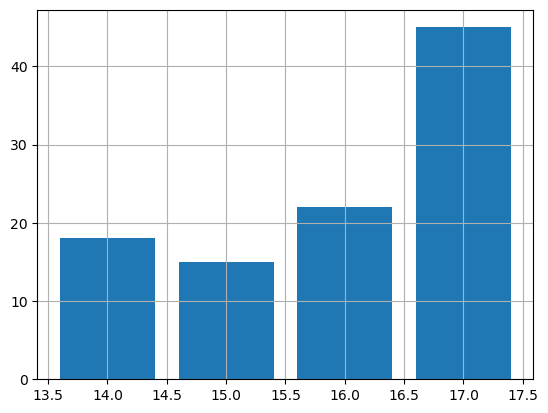

In [24]:
df['age'].hist(bins=range(14, 19), align='left', rwidth=0.8)

<Axes: xlabel='gpa', ylabel='Count'>

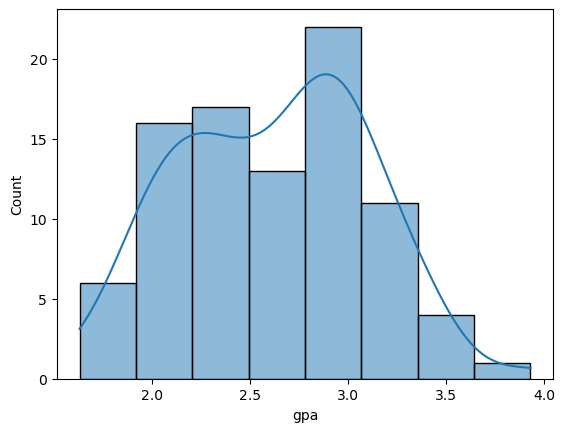

In [25]:
import seaborn as sns
sns.histplot(df["gpa"], kde=True)

There seems to be skew to the right for the gpa, and there seems to be a skew to the left for the age distribution

<Axes: xlabel='gpa', ylabel='age'>

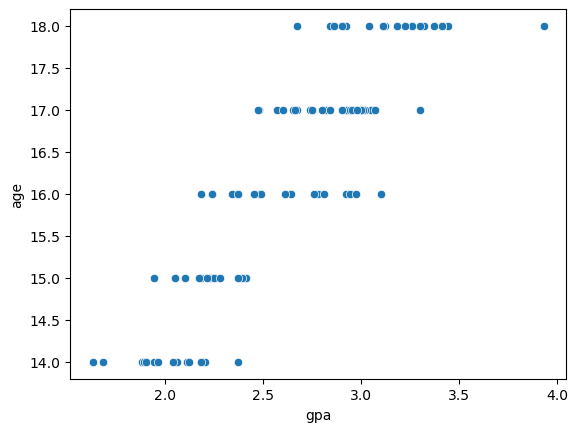

In [30]:
sns.scatterplot(df, x = 'gpa', y = 'age')

In this data, it seems to be that gpa is positively correlated with age

In [57]:
import numpy as np
df["major"]= df["major"].str.lower()
df["major"] = df["major"].str.strip()
df["major"] = df["major"].replace(r'^\s*$', np.nan, regex=True)
df = df.dropna(subset = ['major'])

In [61]:
df.to_csv('data/students_clean.csv', index=False) 

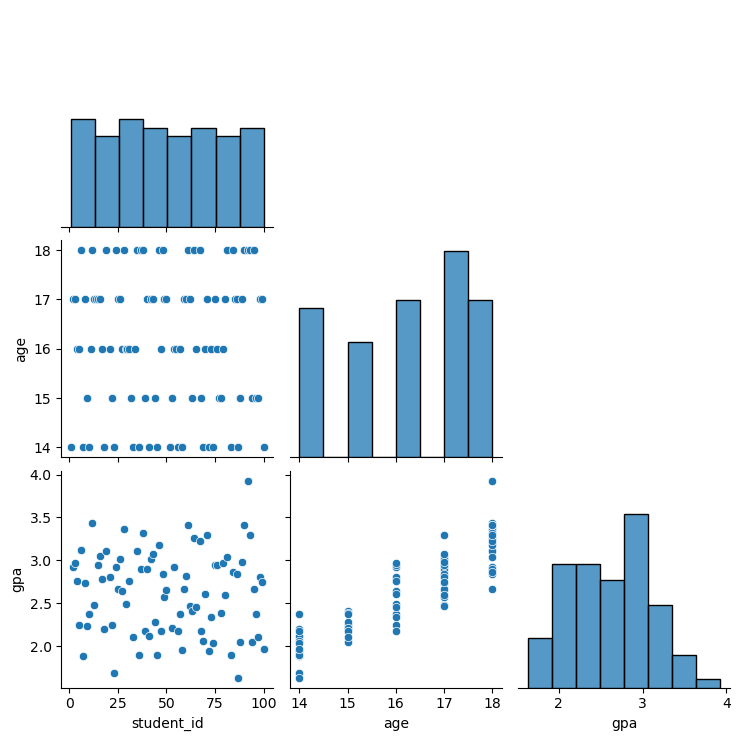

In [67]:
sns.pairplot(df, corner = True)

I see that student id and gpa is not correlated with anything, while age and gpa seem correlated. Meanwhile, I also see that gpa has the most missing, followed by major, probably because gpa might not be finalied and major might not be decided